In [1]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

(b) Breakthrough Curve

In [2]:
# csv file can be found in my repository - https://github.com/amvro23/Adsorption_Isotherms_Kinetics
df = pd.read_csv('Co_10%.csv')

# define x: minutes and y: Ct/C0 column
xData = df.loc[:, 'x']
yData = df.loc[:, 'y']

<function matplotlib.pyplot.tight_layout(*, pad=1.08, h_pad=None, w_pad=None, rect=None)>

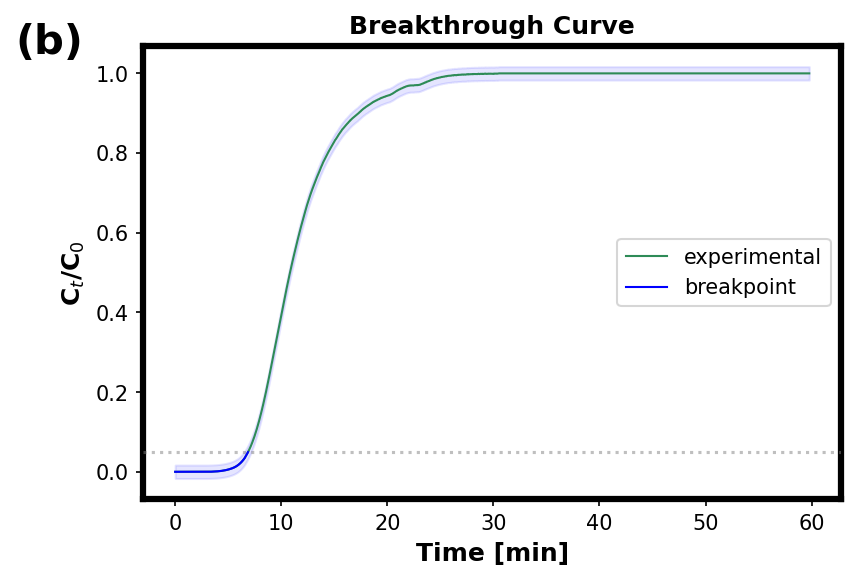

In [3]:
# define the size of the figure
fig, ax = plt.subplots(figsize=(6,4), dpi=150)

# breakpoint at Ct/Co = 0.05
bp_index = yData[yData <= 0.05].index
xData_bp = xData.loc[bp_index]
yData_bp = yData.loc[bp_index]

# plot experimental data
ax.plot(xData, yData, color='seagreen',label='experimental', lw = 1)
ax.plot(xData_bp, yData_bp, "b", label='breakpoint', lw = 1)

# 1.96 is used because the 95% confidence interval has only 2.5 % on each side.
ci = 1.96 * np.std(yData)/np.sqrt(len(xData))
ax.fill_between(xData, (yData-ci), (yData+ci), color='b', alpha=0.1)

# plot a breakpoint line where Ct/Co = 0.05
ax.axhline(y=0.05, color='grey', linestyle=':', alpha=0.5)

# edit plot
ax.set_xlabel("Time [min]", fontsize=12, fontweight='bold')
ax.set_ylabel("C$_t$/C$_0$", fontsize=12, fontweight='bold')

for axis in ['top','bottom','left','right']:
    ax.spines[axis].set_linewidth(3)
    ax.spines[axis].set_color('k')
    ax.spines[axis].set_zorder(1)

plt.text(-15.1, 1.05, '(b)', fontsize=20, fontweight='bold')
plt.title('Breakthrough Curve', fontsize=12, fontweight='bold', loc = 'center')
plt.legend()
plt.tight_layout